In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft
import mogptk

In [2]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

In [3]:
x=np.linspace(0,1,1600)

In [4]:
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]

Text(0, 0.5, 'Y')

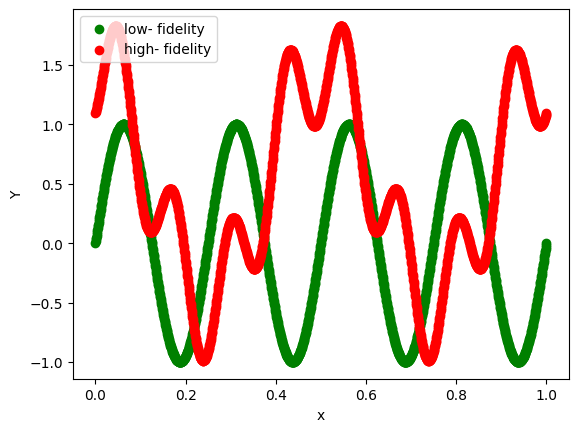

In [5]:
plt.scatter(x, points1, c="g", label="low- fidelity")
plt.scatter(x, points2, c="r", label="high- fidelity")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("Y")
#plt.show()


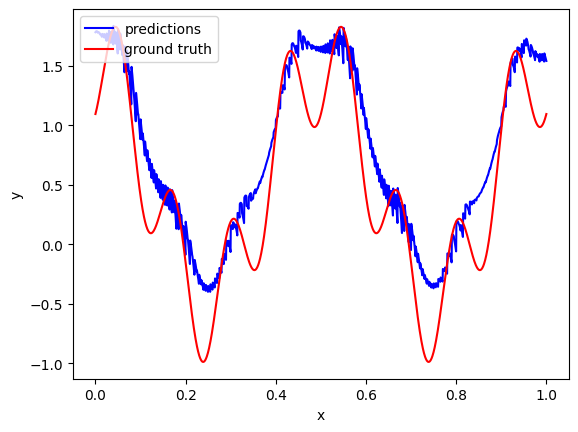

In [6]:
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train+[0,0])



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm")
m2_real = mogptk.LoadModel('m2_r_sin_sm')
m3_real = mogptk.LoadModel('m3_r_sin_sm')
m4_real = mogptk.LoadModel('m4_r_sin_sm')
m5_real = mogptk.LoadModel('m5_r_sin_sm')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm")
m2_im = mogptk.LoadModel('m2_i_sin_sm')
m3_im = mogptk.LoadModel('m3_i_sin_sm')
m4_im = mogptk.LoadModel('m4_i_sin_sm')
m5_im = mogptk.LoadModel('m5_i_sin_sm')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_nargp_freq.jpeg")

In [7]:

from calc_rmse import calc_rmse
calc_rmse(values_kernel, np.asarray(points2))

0.3876434932019276

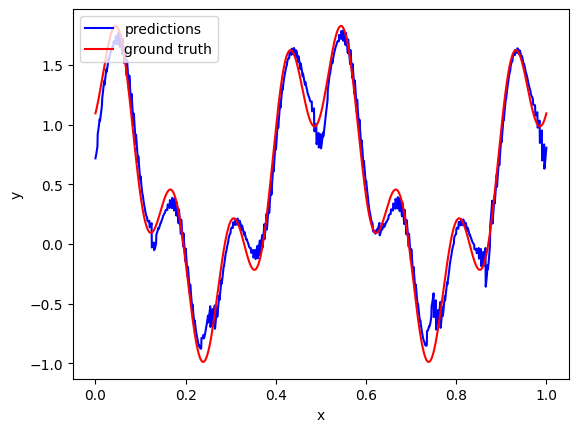

In [8]:
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train+[0,0])



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp")
m2_real = mogptk.LoadModel('m2_r_sin_nargp')
m3_real = mogptk.LoadModel('m3_r_sin_nargp')
m4_real = mogptk.LoadModel('m4_r_sin_nargp')
m5_real = mogptk.LoadModel('m5_r_sin_nargp')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp")
m2_im = mogptk.LoadModel('m2_i_sin_nargp')
m3_im = mogptk.LoadModel('m3_i_sin_nargp')
m4_im = mogptk.LoadModel('m4_i_sin_nargp')
m5_im = mogptk.LoadModel('m5_i_sin_nargp')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_nargp_freq.jpeg")

In [9]:
from calc_rmse import calc_rmse
calc_rmse(values_kernel, np.asarray(points2))

0.128842886517097

[-0.05576206 -0.08990799 -0.08008152 -0.05449349 -0.01240195]
[ 0.15264369  0.17776532  0.12486422  0.00972077 -0.15293922]


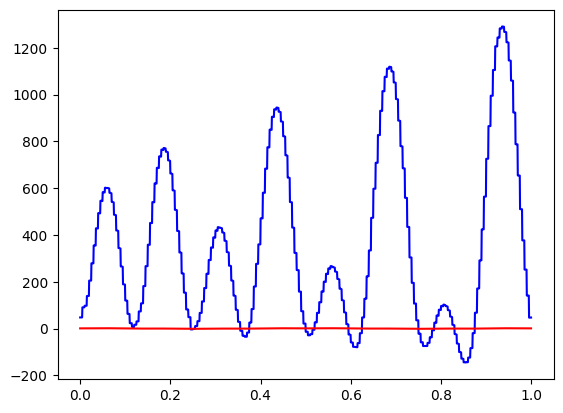

In [25]:
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin")
m2_real = mogptk.LoadModel('m2_r_sin')
m3_real = mogptk.LoadModel('m3_r_sin')
m4_real = mogptk.LoadModel('m4_r_sin')
m5_real = mogptk.LoadModel('m5_r_sin')
 

m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin')
m3_im = mogptk.LoadModel('m3_i_sin')
m4_im = mogptk.LoadModel('m4_i_sin')
m5_im = mogptk.LoadModel('m5_i_sin')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []

print(real2[:5])
print(im2[:5])

for r, im1 in zip(real, im):
        first.append(r*74.7126 + 1j * im1*1.0000e-12)
for r, im in zip(real2, im2):
        second.append(r*1.0042 + 1j * im*2.3934)
for r, im in zip(real3, im3):
        third.append(r*0.9875 + 1j * im*0.9875)
for r, im in zip(real4, im4):
        fourth.append(r*0.9865 + 1j * im*0.4088)

for r, im in zip(real5, im5):
        fifth.append(r*0.9863 + 1j * im*1.0000e-12)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b")
plt.plot(x,points2, c="r")

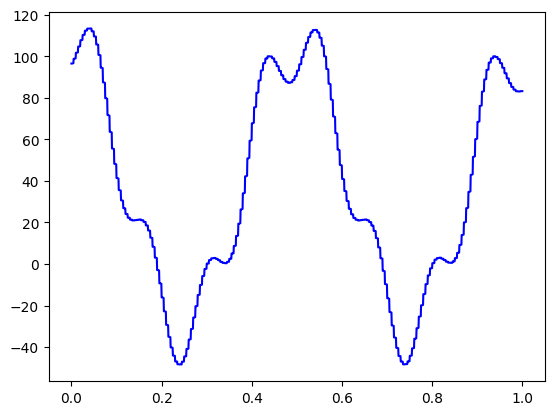

In [29]:
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):


    real_train=[]


    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_orig")
m2_real = mogptk.LoadModel('m2_r_sin_orig')
m3_real = mogptk.LoadModel('m3_r_sin_orig')
m4_real = mogptk.LoadModel('m4_r_sin_orig')
m5_real = mogptk.LoadModel('m5_r_sin_orig')
 

m1_im = mogptk.LoadModel("m1_i_sin_orig")
m2_im = mogptk.LoadModel('m2_i_sin_orig')
m3_im = mogptk.LoadModel('m3_i_sin_orig')
m4_im = mogptk.LoadModel('m4_i_sin_orig')
m5_im = mogptk.LoadModel('m5_i_sin_orig')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r*74.7126 + 1j * im1*1.0000e-12)
for r, im in zip(real2, im2):
        second.append(r*1.0042 + 1j * im*2.3934)
for r, im in zip(real3, im3):
        third.append(r*0.9875 + 1j * im*0.9875)
for r, im in zip(real4, im4):
        fourth.append(r*0.9865 + 1j * im*0.4088)

for r, im in zip(real5, im5):
        fifth.append(r*0.9863 + 1j * im*1.0000e-12)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()
plt.plot(x, values, c="b")
#plt.plot(x,points2, c="r")
#plt.plot(x, values_kernel, c="g")

In [9]:
s=np.asarray([1,2,5,10,15,20,25,30,35,40])
from numpy.fft import fft
fft(s)

array([183.        +0.00000000e+00j, -17.38196601+7.57665179e+01j,
       -18.38196601+3.25074350e+01j, -19.61803399+1.62614502e+01j,
       -20.61803399+6.94742190e+00j, -21.        -3.55271368e-15j,
       -20.61803399-6.94742190e+00j, -19.61803399-1.62614502e+01j,
       -18.38196601-3.25074350e+01j, -17.38196601-7.57665179e+01j])

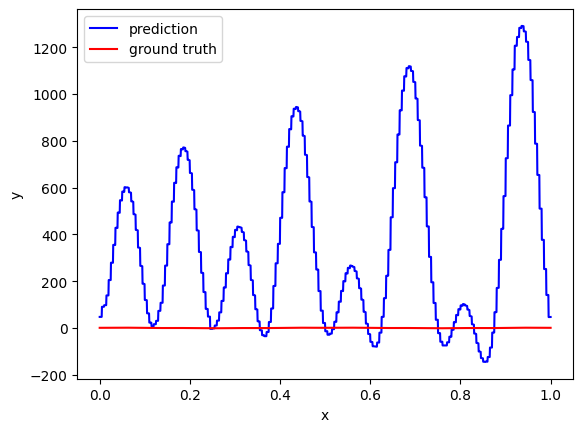

In [7]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

x=np.linspace(0,1,1600)

points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]

f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_norm")
m2_real = mogptk.LoadModel('m2_r_sin_norm')
m3_real = mogptk.LoadModel('m3_r_sin_norm')
m4_real = mogptk.LoadModel('m4_r_sin_norm')
m5_real = mogptk.LoadModel('m5_r_sin_norm')
 

m1_im = mogptk.LoadModel("m1_i_sin_norm")
m2_im = mogptk.LoadModel('m2_i_sin_norm')
m3_im = mogptk.LoadModel('m3_i_sin_norm')
m4_im = mogptk.LoadModel('m4_i_sin_norm')
m5_im = mogptk.LoadModel('m5_i_sin_norm')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r*74.7126 + 1j * im1*1.0000e-12)
for r, im in zip(real2, im2):
        second.append(r*1.0042 + 1j * im*2.3934)
for r, im in zip(real3, im3):
        third.append(r*0.9875 + 1j * im*0.9875)
for r, im in zip(real4, im4):
        fourth.append(r*0.9865 + 1j * im*0.4088)

for r, im in zip(real5, im5):
        fifth.append(r*0.9863 + 1j * im*1.0000e-12)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()

plt.plot(x, values_kernel, c="b", label="prediction")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_kernel_freq.jpeg")

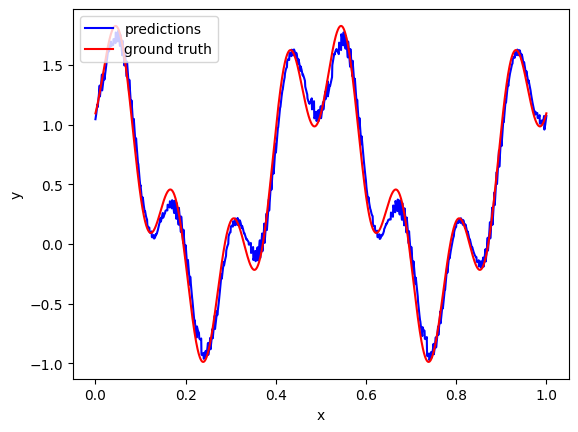

In [10]:
# tests with nargp and without frequencies
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []

probe_x=[]
probe_x2=[]
for i in range(200):
    value1 = (f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k)
     #   real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

    probe_x.append(points[i][0])
    probe_x2.append(points[i][1])
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_sm_no_freq")
m2_real = mogptk.LoadModel('m2_r_sin_sm_no_freq')
m3_real = mogptk.LoadModel("m3_r_sin_sm_no_freq")
m4_real = mogptk.LoadModel('m4_r_sin_sm_no_freq')
m5_real = mogptk.LoadModel('m5_r_sin_sm_no_freq')
 

m1_im = mogptk.LoadModel("m1_i_sin_sm_no_freq")
m2_im = mogptk.LoadModel('m2_i_sin_sm_no_freq')
m3_im = mogptk.LoadModel('m3_i_sin_sm_no_freq')
m4_im = mogptk.LoadModel('m4_i_sin_sm_no_freq')
m5_im = mogptk.LoadModel('m5_i_sin_sm_no_freq')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []

probe_points=[]
probe_points2r=[]
probe_points2i=[]
probe_points5r=[]
probe_points5i=[]
for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
        probe_points.append(r)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
        probe_points2r.append(r)
        probe_points2i.append(im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)
        probe_points5r.append(r)
        probe_points5i.append(im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("sm_nargp_nofreq.jpeg")

In [11]:
calc_rmse(values_kernel, points2)

0.09706591723119036

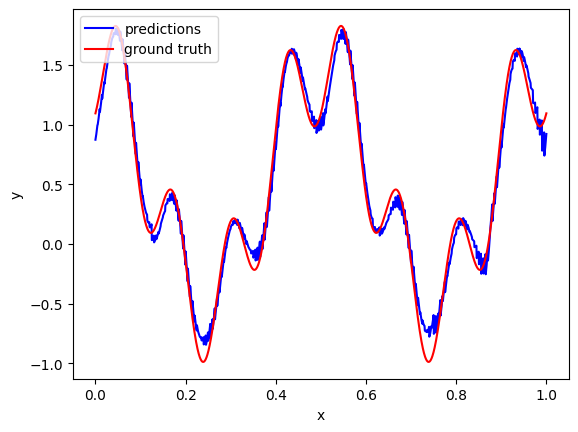

In [12]:
# tests with nargp and without frequencies
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = (f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k)
     #   real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp_no_freq")
m2_real = mogptk.LoadModel('m2_r_sin_nargp_no_freq')
m3_real = mogptk.LoadModel("m3_r_sin_nargp_no_freq")
m4_real = mogptk.LoadModel('m4_r_sin_nargp_no_freq')
m5_real = mogptk.LoadModel('m5_r_sin_nargp_no_freq')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp_no_freq")
m2_im = mogptk.LoadModel('m2_i_sin_nargp_no_freq')
m3_im = mogptk.LoadModel('m3_i_sin_nargp_no_freq')
m4_im = mogptk.LoadModel('m4_i_sin_nargp_no_freq')
m5_im = mogptk.LoadModel('m5_i_sin_nargp_no_freq')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_nargp_nofreq.jpeg")

In [13]:
calc_rmse(values_kernel, points2)

0.10665478227006292

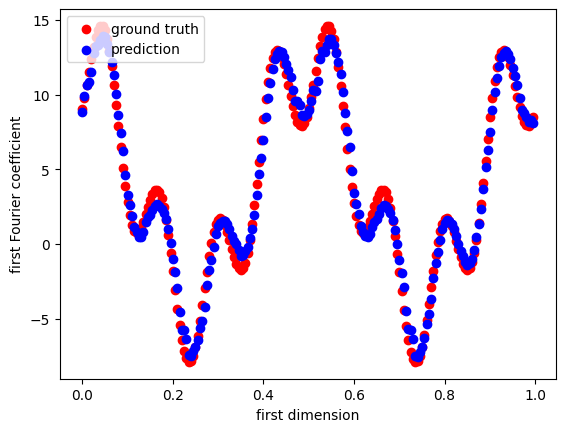

In [34]:
#plot optimised function, first frequency
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[0].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[0].imag)

plt.scatter(first_point, (first_freq_real),c="r", label="ground truth")
plt.scatter(first_point, probe_points, c="b", label="prediction")
plt.xlabel("first dimension")
plt.ylabel("first Fourier coefficient")
plt.legend(loc="upper left")
plt.savefig("first_freq_custom.jpeg")

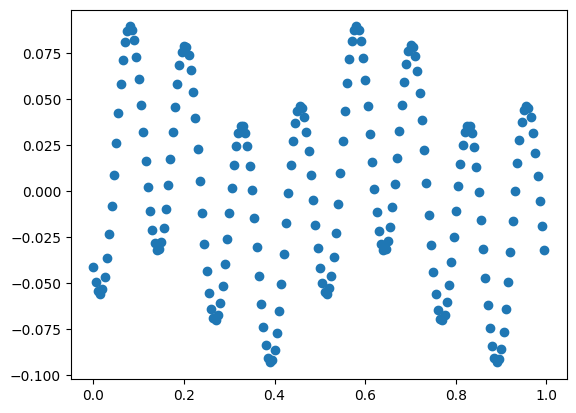

In [45]:
# optimised function second frequency
#plot optimised function, first frequency
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[3].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[3].imag)

plt.scatter(first_point, (first_freq_real))

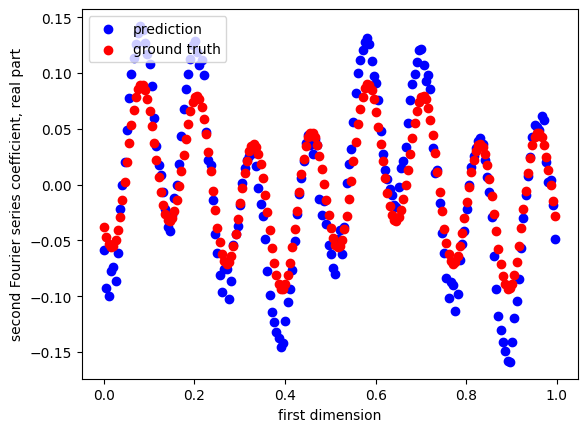

In [37]:
plt.scatter(probe_x2, probe_points2r, c="b", label="prediction")
plt.scatter(probe_x2, first_freq_real, c="r", label="ground truth")
plt.xlabel("first dimension")
plt.ylabel("second Fourier series coefficient, real part")
plt.legend(loc="upper left")
plt.savefig("second_freq_custom_real.jpeg")

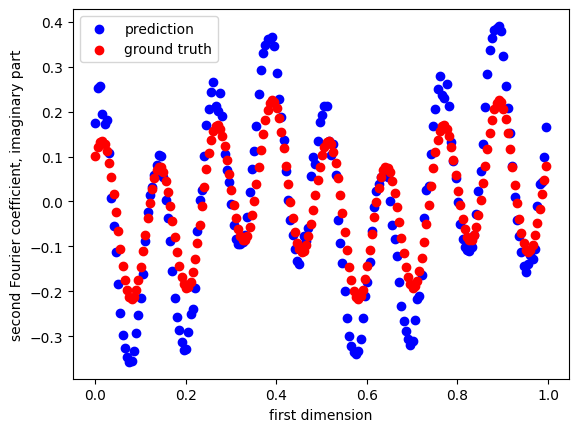

In [38]:
plt.scatter(probe_x2, probe_points2i,c="b", label="prediction")
plt.scatter(probe_x2,first_freq_imag, c="r", label="ground truth")
plt.xlabel("first dimension")
plt.ylabel("second Fourier coefficient, imaginary part")
plt.legend(loc="upper left")
plt.savefig("second_freq_custom_imag.jpeg")

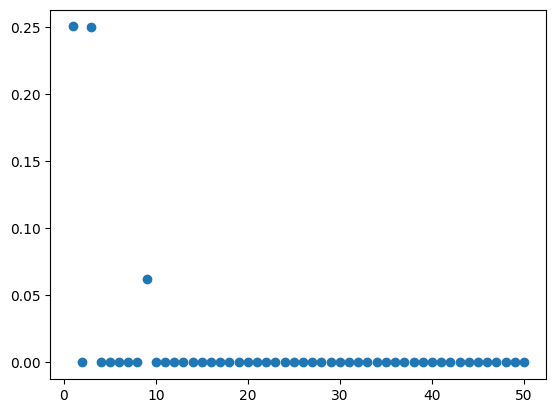

In [43]:
# printing spectrum of function. plot high-fidelity
freq=rfft(points2)/1600
num=np.linspace(1,50,50)
plt.scatter(num, np.abs(freq)[:50]**2)

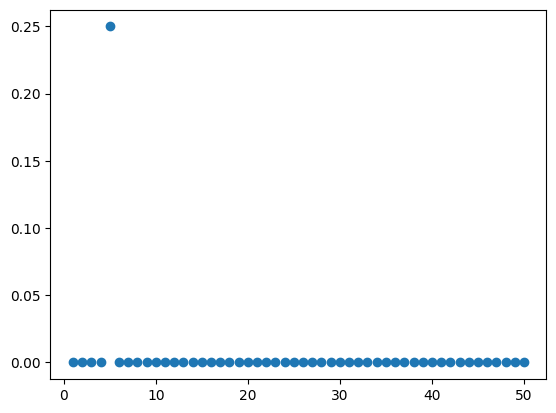

In [41]:
#plot low-fidelity
freq2=rfft(points1)/1600
num=np.linspace(1,50,50)
plt.scatter(num, np.abs(freq2)[:50]**2)

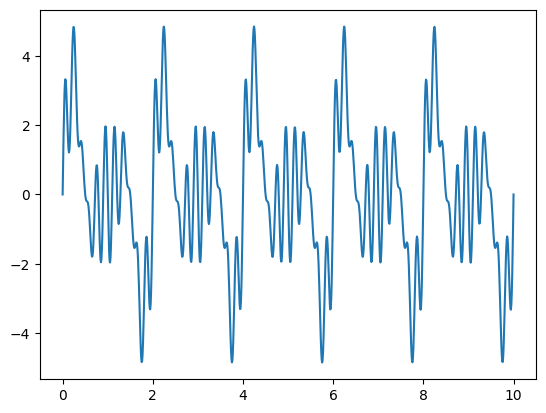

In [14]:
def func_test(x):
    low_freq= np.sin(np.pi*x)+2*np.sin(2*np.pi*x)+ np.sin(3*np.pi*x)
    high_freq=np.sin(9*np.pi*x)+np.sin(11*np.pi*x)
    return low_freq+high_freq
    
x_p=np.linspace(0,10,1000)
points3=[func_test(i) for i in x_p]
plt.plot(x_p, points3)
    

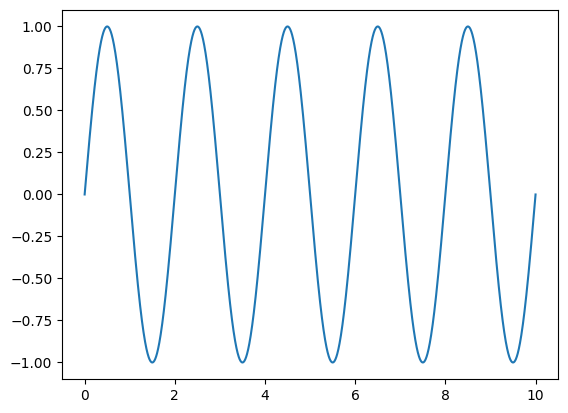

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def func_test4(x):
    return np.sin(np.pi*x)
xP=np.linspace(0,10,2000)
points7=[func_test4(i) for i in xP]
plt.plot(xP, points7)
plt.savefig("sinusoid.jpeg")

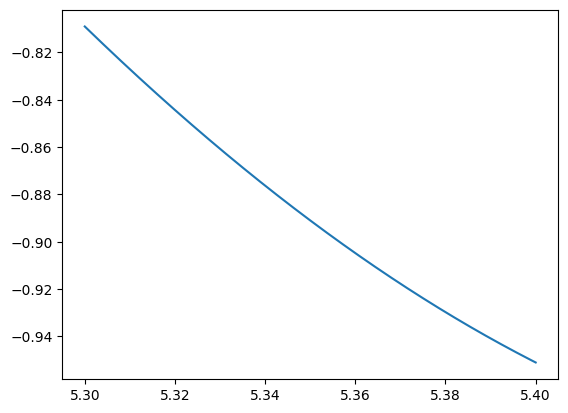

In [31]:
xc=np.linspace(5.3, 5.4, 2000)
points8=[func_test4(i) for i in xc]
plt.plot(xc, points8)
plt.savefig("part_of_sinusoid.jpeg")

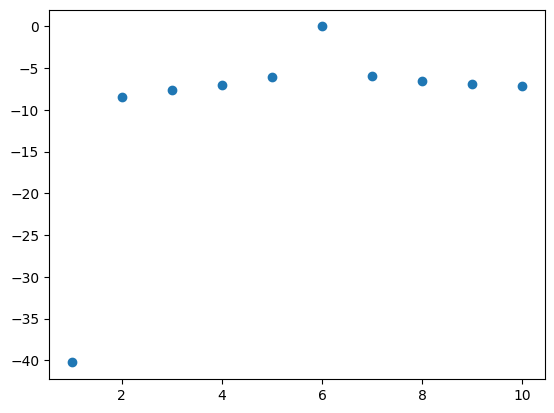

In [28]:
from numpy.fft import rfft, irfft
freq_full=rfft(points7)/1001
num_freq=np.linspace(1,10,10)
plt.scatter(num_freq, np.log(np.abs(freq_full))[:10])
plt.savefig("freq_full_log.jpeg")

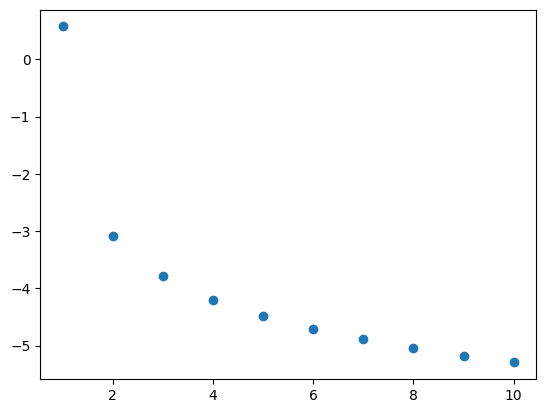

In [29]:
freq_full2=rfft(points8)/1001
num_freq=np.linspace(1,10,10)
plt.scatter(num_freq,  np.log(np.abs(freq_full2))[:10])
plt.savefig("freq_partial_log.jpeg")

In [22]:
rfft(points8)[:10]/1001

array([-1.77291362e+00+0.j        ,  4.51900520e-03-0.04529617j,
        1.18089543e-03-0.0226055j ,  5.64102417e-04-0.01506503j,
        3.48326173e-04-0.01129733j,  2.48470372e-04-0.00903729j,
        1.94232428e-04-0.00753078j,  1.61530262e-04-0.00645476j,
        1.40305945e-04-0.00564778j,  1.25754916e-04-0.00502014j])

In [23]:
rfft(points7)[:10]/1001

array([ 3.28574996e-18+0.00000000e+00j,  3.26738515e-07-2.08008028e-04j,
        1.49343961e-06-4.75375028e-04j,  4.40867444e-06-9.35542848e-04j,
        1.39166894e-05-2.21488077e-03j,  7.84401202e-03-9.98710094e-01j,
       -2.57491431e-05+2.73198804e-03j, -1.60436017e-05+1.45903749e-03j,
       -1.28901546e-05+1.02571192e-03j, -1.13593931e-05+8.03459164e-04j])

In [49]:
def low_fidelity(x):
    return np.sin(8*np.pi*x)

def high_fidelity(x):
    return np.sin(8*np.pi*x+np.pi/10)**2+np.cos(4*np.pi*x)

x=np.linspace(0,1,1600)

points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]

f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("complex_tests_third_function/m1_r_sin")
m2_real = mogptk.LoadModel('m2_r_sin')
m3_real = mogptk.LoadModel('m3_r_sin')
m4_real = mogptk.LoadModel('m4_r_sin')
m5_real = mogptk.LoadModel('m5_r_sin')
 

m1_im = mogptk.LoadModel("m1_i_sin")
m2_im = mogptk.LoadModel('m2_i_sin')
m3_im = mogptk.LoadModel('m3_i_sin')
m4_im = mogptk.LoadModel('m4_i_sin')
m5_im = mogptk.LoadModel('m5_i_sin')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []

probe_points=[]
probe_points2r=[]
probe_points2i=[]
probe_points5r=[]
probe_points5i=[]
for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
        probe_points.append(r)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
        probe_points2r.append(r)
        probe_points2i.append(im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)
        probe_points5r.append(r)
        probe_points5i.append(im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()

FileNotFoundError: [Errno 2] No such file or directory: 'complex_tests_third_function/m1_r_sin.npy'

In [ ]:
plt.scatter(probe_x, )

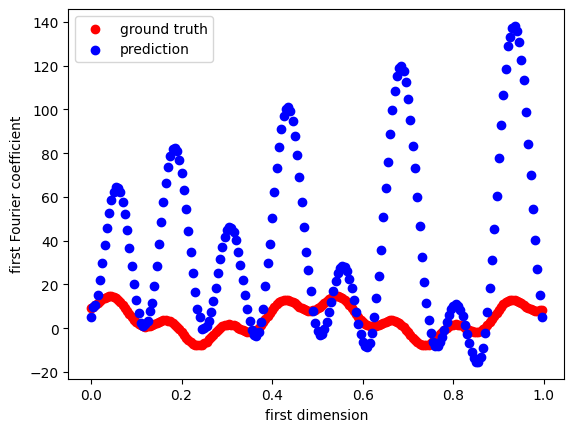

In [48]:
#plot optimised function, first frequency
f2=[]
f1=[]
i=0
points=[]
while i< len(points1):
    f2.append(points2[i:i+8])
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []
first_freq_real=[]
first_point=[]
first_freq_imag=[]
for i in range(200):
    value1 = rfft(f2[i])
   
    first_freq_real.append(value1[0].real)
    first_point.append(points[i][0])
    first_freq_imag.append(value1[0].imag)

plt.scatter(first_point, (first_freq_real),c="r", label="ground truth")
plt.scatter(first_point, probe_points, c="b", label="prediction")
plt.xlabel("first dimension")
plt.ylabel("first Fourier coefficient")
plt.legend(loc="upper left")
plt.savefig("first_freq_custom.jpeg")

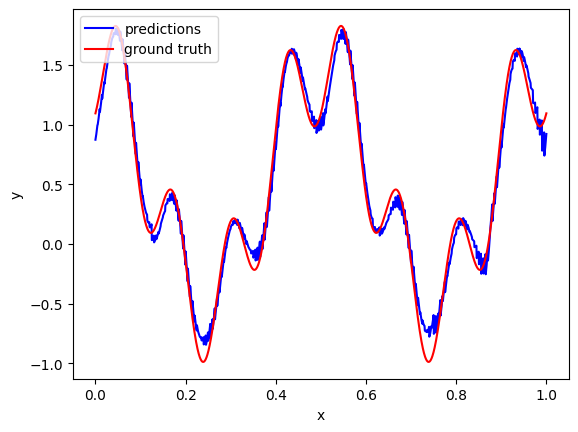

In [50]:
# tests with nargp and without frequencies
f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = (f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k)
     #   real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train)



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp_no_freq")
m2_real = mogptk.LoadModel('m2_r_sin_nargp_no_freq')
m3_real = mogptk.LoadModel("m3_r_sin_nargp_no_freq")
m4_real = mogptk.LoadModel('m4_r_sin_nargp_no_freq')
m5_real = mogptk.LoadModel('m5_r_sin_nargp_no_freq')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp_no_freq")
m2_im = mogptk.LoadModel('m2_i_sin_nargp_no_freq')
m3_im = mogptk.LoadModel('m3_i_sin_nargp_no_freq')
m4_im = mogptk.LoadModel('m4_i_sin_nargp_no_freq')
m5_im = mogptk.LoadModel('m5_i_sin_nargp_no_freq')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()
plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("custom_nargp_nofreq.jpeg")

In [51]:
points[20]

array([0.10006254, 0.10068793, 0.10131332, 0.10193871, 0.1025641 ,
       0.10318949, 0.10381488, 0.10444028])

In [52]:
points[21]

array([0.10506567, 0.10569106, 0.10631645, 0.10694184, 0.10756723,
       0.10819262, 0.10881801, 0.1094434 ])

In [53]:
points[20][7]-points[21][0]

-0.0006253908692933074

In [54]:
points[20][1]- points[20][2]

-0.0006253908692933074

In [70]:
p1=points[20]
p2=points[20][7]
step=0.0006253908692933074
pp=[]
for i in range(8):
    pp.append(p2+ i*step)

In [71]:
p1

array([0.10006254, 0.10068793, 0.10131332, 0.10193871, 0.1025641 ,
       0.10318949, 0.10381488, 0.10444028])

In [72]:
pp=np.asarray(pp)

In [84]:
np.asarray(pp)

array([0.10444028, 0.10506567, 0.10569106, 0.10631645, 0.10694184,
       0.10756723, 0.10819262, 0.10881801, 0.49403297, 0.48030679,
       0.46646195, 0.45250187, 0.43843001, 0.42424983, 0.40996485,
       0.39557858])

In [73]:
pp[1]-pp[2]

-0.0006253908692933074

In [74]:
p1[1]-p1[2]

-0.0006253908692933074

In [77]:
f1=[low_fidelity(i) for i in p1]
f2=[low_fidelity(i) for i in pp]
p1= list(p1)+ f1
pp=list(pp)+f2
test_smpl=torch.tensor([list(p1),list(pp)])

In [78]:
pp

[0.10444027517198248,
 0.10506566604127579,
 0.1056910569105691,
 0.1063164477798624,
 0.10694183864915571,
 0.10756722951844902,
 0.10819262038774233,
 0.10881801125703564,
 0.49403297411233227,
 0.48030679050646596,
 0.4664619501154446,
 0.45250187322039737,
 0.43843000857091025,
 0.4242498325330343,
 0.40996484823046975,
 0.3955785846791436]

In [81]:
_, real, _, _ = m1_real.predict(test_smpl)
_, real2, _, _ = m2_real.predict(test_smpl)
_, real3, _, _ = m3_real.predict(test_smpl)
_, real4, _, _ = m4_real.predict(test_smpl)
_, real5, _, _ = m5_real.predict(test_smpl)


_, im, _, _ = m1_im.predict(test_smpl)
_, im2, _, _ = m2_im.predict(test_smpl)
_, im3, _, _ = m3_im.predict(test_smpl)
_, im4, _, _ = m4_im.predict(test_smpl)
_, im5, _, _ = m5_im.predict(test_smpl)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1)

In [82]:
values_kernel


array([[0.70771914, 0.71846437, 0.73069569, 0.74434841, 0.75935163,
        0.77562855, 0.79309676, 0.8116686 ],
       [0.53959626, 0.55992082, 0.58179696, 0.60516182, 0.62994617,
        0.65607474, 0.68346647, 0.71203484]])

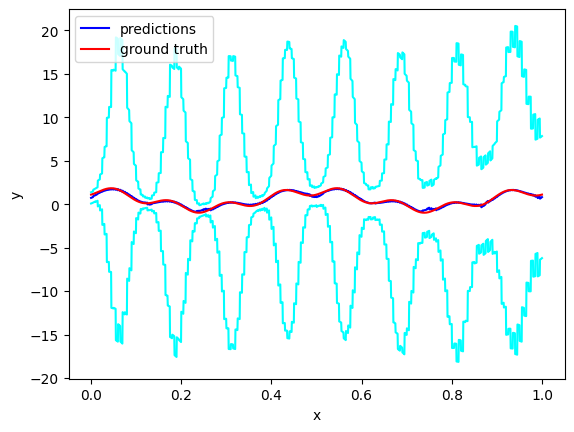

In [7]:
#tests with calculation of variancr
from calc_var import calculate_variance

f1=[]
i=0
points=[]
while i< len(points1):
   
    f1.append(points1[i:i+8])
    points.append(x[i:i+8])
    i+=8
    
f1_real = []


for i in range(200):
    value1 = rfft(f1[i])
   
    real_train=[]

    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)

    for p in range(len(points[i])):
        real_train.append(points[i][p])

  
    f1_real.append(real_train+[0,0])



x_train_real = torch.tensor(np.asarray(f1_real))

m1_real = mogptk.LoadModel("m1_r_sin_nargp")
m2_real = mogptk.LoadModel('m2_r_sin_nargp')
m3_real = mogptk.LoadModel('m3_r_sin_nargp')
m4_real = mogptk.LoadModel('m4_r_sin_nargp')
m5_real = mogptk.LoadModel('m5_r_sin_nargp')
 

m1_im = mogptk.LoadModel("m1_i_sin_nargp")
m2_im = mogptk.LoadModel('m2_i_sin_nargp')
m3_im = mogptk.LoadModel('m3_i_sin_nargp')
m4_im = mogptk.LoadModel('m4_i_sin_nargp')
m5_im = mogptk.LoadModel('m5_i_sin_nargp')
 
 
_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)


_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []


for r, im1 in zip(real, im):
        first.append(r + 1j * im1)
for r, im in zip(real2, im2):
        second.append(r + 1j * im)
for r, im in zip(real3, im3):
        third.append(r + 1j * im)
for r, im in zip(real4, im4):
        fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
        fifth.append(r + 1j * im)


result = []
for i in range(len(first)):
        result.append([first[i], second[i], third[i], fourth[i], fifth[i]])
result = np.asarray(result)

values_kernel = irfft(result, axis=1).flatten()

real,sigma = m1_real.gpr.predict_f(x_train_real)

real2, sigma2 = m2_real.gpr.predict_f(x_train_real)
real3,sigma3 = m3_real.gpr.predict_f(x_train_real)
real4,sigma4 = m4_real.gpr.predict_f(x_train_real)
real5, sigma5 = m5_real.gpr.predict_f(x_train_real)


im, sigma_im = m1_im.gpr.predict_f(x_train_real)
im2, sigma_im2 = m2_im.gpr.predict_f(x_train_real)
im3, sigma_im3 = m3_im.gpr.predict_f(x_train_real)
im4, sigma_im4= m4_im.gpr.predict_f(x_train_real)
im5, sigma_im5 = m5_im.gpr.predict_f(x_train_real)


real_variance=[sigma.numpy(), sigma2.numpy(), sigma3.numpy(), sigma4.numpy(), sigma5.numpy()]
imag_variance=[sigma_im.numpy(), sigma_im2.numpy(), sigma_im3.numpy(), sigma_im4.numpy(), sigma_im5.numpy()]

variances=[]
variance_upper=[]
variance_lower=[]
counter=0
while counter<200:
        local_r_variances=[real_variance[0][counter][0], real_variance[1][counter][0], real_variance[2][counter][0], real_variance[3][counter][0], real_variance[4][counter][0]]
        local_i_variances=[imag_variance[0][counter][0], imag_variance[1][counter][0], imag_variance[2][counter][0], imag_variance[3][counter][0],imag_variance[4][counter][0], ]
        counter+=1
        for i in range(8):
                variance=calculate_variance(i,local_r_variances, local_i_variances,int(8))
                variances.append(variance)

for i in range(len(variances)):
        variance_upper.append(values_kernel[i]+variances[i]/2)
        variance_lower.append(values_kernel[i]-variances[i]/2)

plt.plot(x, values_kernel, c="b", label="predictions")
plt.plot(x,points2, c="r", label="ground truth")
plt.plot(x, variance_upper, c="cyan")
plt.plot(x, variance_lower, c="cyan")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")


In [8]:
4/4**2

0.25

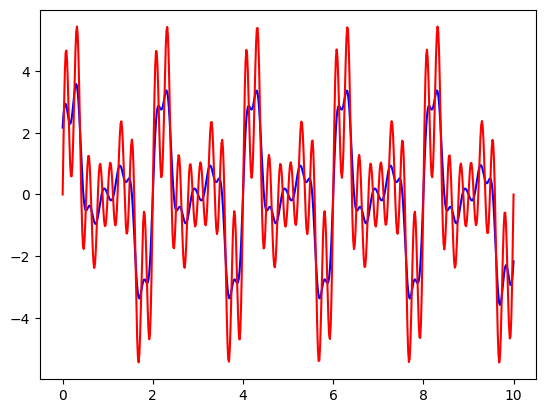

In [17]:
import mogptk
def func_test(x):
    low_freq= np.sin(np.pi*x)+2*np.sin(2*np.pi*x)+ np.sin(3*np.pi*x)
    high_freq=np.sin(7*np.pi*x)+2*np.sin(8*np.pi*x)
    return low_freq+high_freq

x=np.linspace(0,10,600)
func=[func_test(i) for i in x]
x_train=torch.tensor(x)
model=mogptk.LoadModel("m1_sin_sm_orig_one_point")
_,real,_,_= model.predict(x_train)
plt.plot(x_train, real,c="b")
plt.plot(x_train,func, c="r")